<a href="https://colab.research.google.com/github/GilbertTjahjono/Flower_Pollination_Algorithm/blob/master/Implementation_of_FPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An Implementation of Flower Pollination Algorithm using Python

Note that in this example, the FPA will be used to find the global minima of Six Hump Camel Function

In [ ]:
import numpy as np
from scipy.stats import levy
import matplotlib.pyplot as plt

from matplotlib import animation
from IPython.display import HTML

In [ ]:
class FPA():
  def __init__(self, switch_probability = 0.8, n_flowers = 50, n_parameters = 2, constraints = None):
    # Initialization of variables
    self.sp = switch_probability
    self.n_flowers = n_flowers
    self.flowers = [None]*n_flowers
    self.cost = np.zeros(n_flowers)
    self.random = np.random
    self.n_parameters = n_parameters
    self.const = constraints

    # Random Initial Flowers
    self.init_flowers()
    # Get the best flower from initial population
    self.best = self.flowers[self.cost.argmin()]

  def Six_Hump_Camel(self, x): #This is the objective function, modify this according to your needs.
    output = (4 - 2.1*(x[0]**2) + (x[0]**4)/3)*x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1]**2
    return output

  def global_pollination(self, x): #Global pollination
    x_new = x + levy.rvs(size = x.shape[0]) * (self.best - x)
    return x_new
  
  def local_pollination(self, x, x1, x2): #Local Pollination
    x_new = x + self.random.randn() * (x1 - x2)
    return x_new

  def init_flowers(self): #Initialization of flowers
    for i in range(self.n_flowers):
      self.flowers[i] = self.random.rand(self.n_parameters)
      if self.const is not None:
        for j in range(self.n_parameters):
          self.flowers[i][j] = self.flowers[i][j] * (self.const[j][1] - self.const[j][0]) + self.const[j][0]
      else:
        self.flowers[i][j] = self.flowers[i][j] * 100 - 50
      self.cost[i] = self.Six_Hump_Camel(self.flowers[i])

  def optimize(self, max_gen = 100):
    # Save history for plotting
    history = np.zeros((max_gen, self.n_parameters))

    # Generation loop
    for i in range(max_gen):
      history[i, :] = self.best #Update history

      # Flower loop
      for j in range(self.n_flowers):
        p = self.random.rand()
        
        # Global Pollination if p <= switch probability
        if p <= self.sp:
          x_temp = self.global_pollination(self.flowers[j])
        
        # Local Pollination if p > switch probability
        else:
          r1 = self.random.randint(0, high = self.n_flowers)
          r2 = self.random.randint(0, high = self.n_flowers)
          while r2 == r1:
            r2 = self.random.randint(0, high = self.n_flowers)
          x_temp = self.local_pollination(self.flowers[j], self.flowers[r1], self.flowers[r2])
        
        # Apply constraints
        if self.const is not None:
          for k in range(self.n_parameters):
            x_temp = np.clip(x_temp, self.const[k][0], self.const[k][1])
        else:
          continue

        # Calculate cost
        cost_temp = self.Six_Hump_Camel(x_temp)
        
        # Compare the newly generated flower with the previous flower
        if cost_temp < self.cost[j]:
          self.flowers[j] = x_temp
          self.cost[j] = cost_temp
        else:
          continue
      
      # Update best
      self.best = self.flowers[self.cost.argmin()]
    
    return self.flowers, self.cost, history

In [ ]:
const = [np.array([-2.5, 2.5]), np.array([-1.5, 1.5])]
FPA = FPA(switch_probability = 0.6, n_flowers = 5, n_parameters = 2, constraints = const)
result, cost, hist = FPA.optimize(25)

In [ ]:
result[cost.argmin()]

array([ 0.0765555 , -0.71455737])

In [ ]:
# Plotting 3D surface plot - generating variables

x1_min, x1_max, x1_step = -2.5, 2.5, .2
x2_min, x2_max, x2_step = -1.5, 1.5, .2

x1, x2 = np.meshgrid(np.arange(x1_min, x1_max + x1_step, x1_step), np.arange(x2_min, x2_max + x2_step, x2_step))

In [ ]:
# Plotting 3D surface plot - defining surface function
f  = lambda x, y: 4*(x**2) + x*y - 4*(y**2) - 2.1*(x**4) + 4*(y**4) + (x**6)/3

In [ ]:
# Plotting 3D surface plot - generate f(x1,x2)
z = f(x1, x2)

In [ ]:
# Extracting the best flower of every generation
x1_best = hist[:, 0].ravel()
x2_best = hist[:, 1].ravel()
z_best = f(x1_best, x2_best).ravel()

# It is known that the global minimas of six hump camel function are (-0.08984201, 0.71265640) dan (0.08984201, -0.71265640)
minima1 = np.array([-0.08984201, 0.71265640])
minima1_ = minima1.reshape(-1, 1)
minima2 = np.array([0.08984201, -0.71265640])
minima2_ = minima2.reshape(-1, 1)

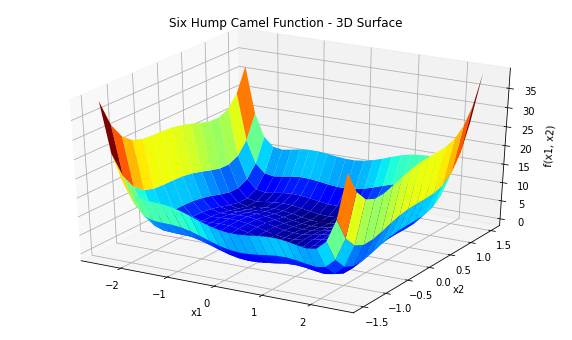

In [ ]:
# 3D Surface Plot

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x1, x2, z, cmap=plt.cm.jet)
ax.quiver(x1_best[:-1], x2_best[:-1], z_best[:-1], x1_best[1:]-x1_best[:-1], x2_best[1:]-x2_best[:-1], z_best[1:]-z_best[:-1], color='k')
ax.plot(*minima1_, f(*minima1_), 'r*', markersize=10)
ax.plot(*minima2_, f(*minima2_), 'r*', markersize=10)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')

plt.title('Six Hump Camel Function - 3D Surface')

plt.show()

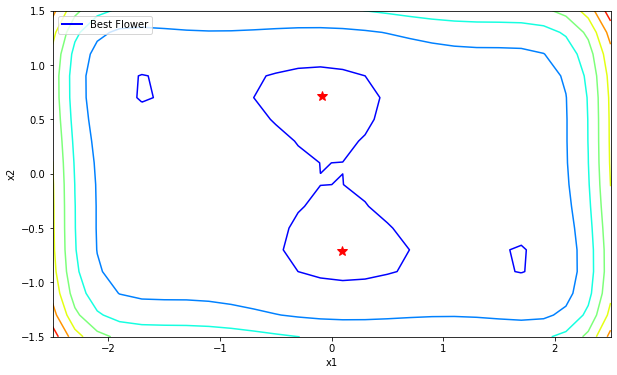

In [ ]:
# First, draw the 2D contour plot and initialize the line and point (which are Line2D objects)
fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x1, x2, z, cmap=plt.cm.jet)
ax.plot(*minima1_, 'r*', markersize=10)
ax.plot(*minima2_, 'r*', markersize=10)

line, = ax.plot([], [], 'b', label='Best Flower', lw=2)
point, = ax.plot([], [], 'bo')

ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax.legend(loc='upper left')

In [ ]:
# Combine the optimal trajectory in an array
path = np.concatenate((x1_best.reshape(-1,1), x2_best.reshape(-1,1)), axis = 1)
path = np.transpose(path)

In [ ]:
# Defining functions to create animation
def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(*path[::,:i])
    point.set_data(*path[::,i-1:i])
    return line, point

In [ ]:
# We define the total number of frames to be the total number of steps taken in the optimization 
# and using blitting so as to only redraw the parts of the animation that have changed
anim = animation.FuncAnimation(fig, animate, init_func = init,
                               frames = path.shape[1], interval = 100,
                               repeat_delay = 2000, blit=True)

In [ ]:
HTML(anim.to_html5_video())